In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

In [2]:
#load datasets
df_classes = pd.read_csv(r"C:\Users\User\Desktop\UAB\3rd year\2nd semester\synthesis project II\elliptic_bitcoin_dataset\elliptic_txs_classes.csv")
df_edges = pd.read_csv(r"C:\Users\User\Desktop\UAB\3rd year\2nd semester\synthesis project II\elliptic_bitcoin_dataset\elliptic_txs_edgelist.csv")
df_features = pd.read_csv(r"C:\Users\User\Desktop\UAB\3rd year\2nd semester\synthesis project II\elliptic_bitcoin_dataset\elliptic_txs_features.csv", header=None)

In [12]:
#change column names to specify if it is a local feature or it is an aggregated one
colNames1 = {'0': 'txId', 1: "Time step"}
colNames2 = {str(ii+2): "Local_feature_" + str(ii+1) for ii in range(93)}
colNames3 = {str(ii+95): "Aggregate_feature_" + str(ii+1) for ii in range(72)}

colNames = dict(colNames1, **colNames2, **colNames3 )
colNames = {int(jj): item_kk for jj,item_kk in colNames.items()}

df_features = df_features.rename(columns=colNames)
df_features.head()

,txId,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,Aggregate_feature_63,Aggregate_feature_64,Aggregate_feature_65,Aggregate_feature_66,Aggregate_feature_67,Aggregate_feature_68,Aggregate_feature_69,Aggregate_feature_70,Aggregate_feature_71,Aggregate_feature_72
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


In [13]:
df_classes.loc[df_classes['class'] == 'unknown', 'class'] = 3

In [14]:
G = nx.from_pandas_edgelist(df_edges, 'txId1', 'txId2')

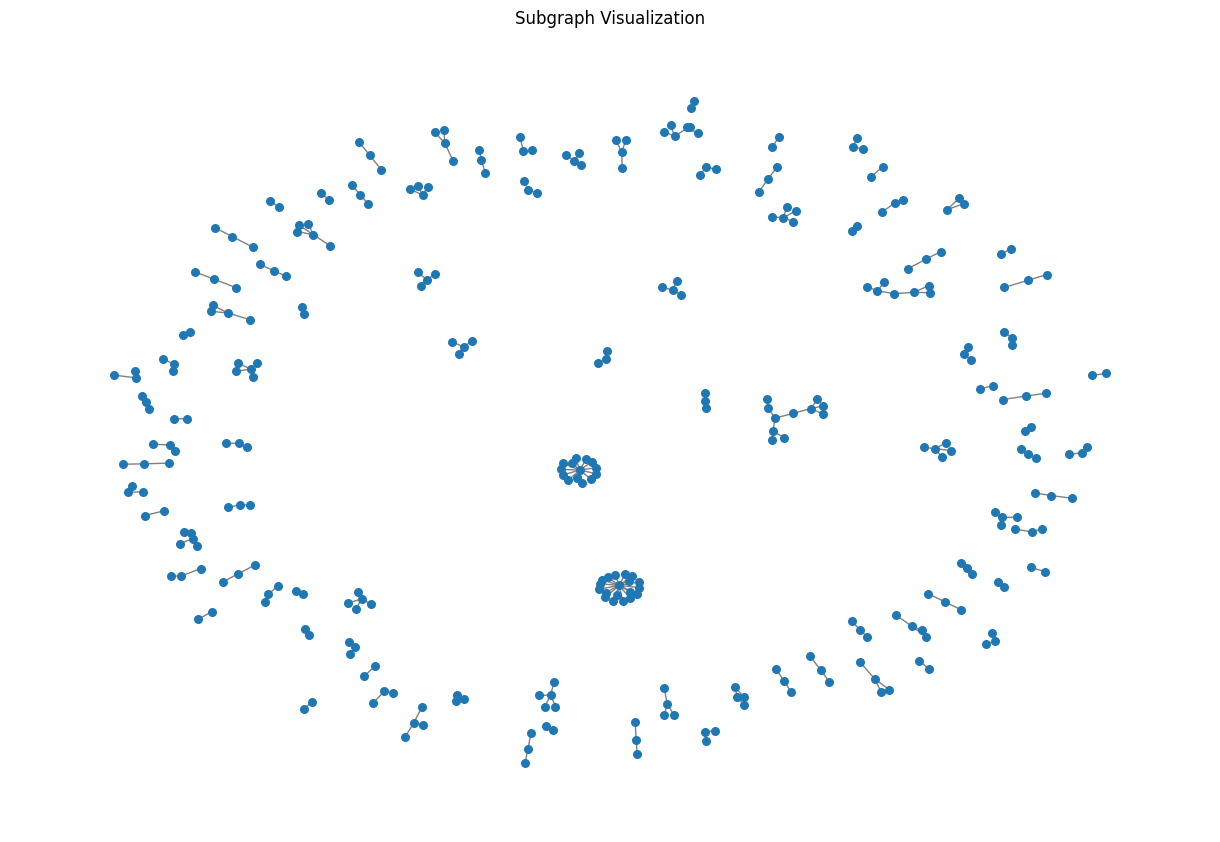

In [29]:
import random

# Select a random sample of nodes
sample_nodes = random.sample(list(G.nodes()), 100)

# Get a subgraph for the sampled nodes
subgraph_nodes = set(sample_nodes)
for node in sample_nodes:
    subgraph_nodes.update(G.neighbors(node))
subG = G.subgraph(subgraph_nodes)

# Now, visualize the subgraph
plt.figure(figsize=(12, 8))
nx.draw(subG, with_labels=False, node_size=30, edge_color='gray')
plt.title('Subgraph Visualization')
plt.show()

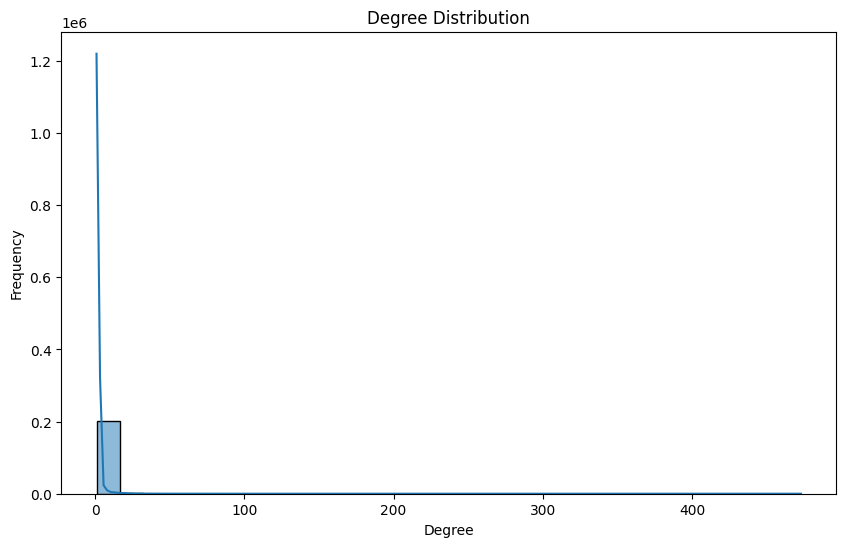

In [15]:
# Degree Distribution
degrees = [G.degree(n) for n in G.nodes()]
plt.figure(figsize=(10, 6))
sns.histplot(degrees, bins=30, kde=True)
plt.title('Degree Distribution')
plt.ylabel('Frequency')
plt.xlabel('Degree')
plt.show()

In [16]:
# Central Nodes (using degree centrality for simplicity)
centrality = nx.degree_centrality(G)
# Sorting nodes by centrality
sorted_central_nodes = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 central nodes by degree centrality:", sorted_central_nodes)

Top 10 central nodes by degree centrality: [(2984918, 0.0023212673236229437), (89273, 0.0014182796121078873), (43388675, 0.0013937419025558478), (68705820, 0.0012121628518707548), (30699343, 0.0011827176004083075), (96576418, 0.0011729025165874917), (225859042, 0.001040398885006478), (279187194, 0.00103549134309607), (234890810, 0.000976600840171175), (196107869, 0.000922617879156688)]


In [17]:
# Clustering Coefficient
clust_coefficient = nx.average_clustering(G)
print("Average clustering coefficient:", clust_coefficient)

Average clustering coefficient: 0.013762190724244798


In [18]:
# Connected Components
connected_components = nx.number_connected_components(G)
print("Number of connected components:", connected_components)

Number of connected components: 49


In [26]:
# Merge class labels with features
df_class_feature = pd.merge(df_classes, df_features )


print(df_class_feature.head())



        txId class  Time step  Local_feature_1  Local_feature_2   
0  230425980     3          1        -0.171469        -0.184668  \
1    5530458     3          1        -0.171484        -0.184668   
2  232022460     3          1        -0.172107        -0.184668   
3  232438397     2          1         0.163054         1.963790   
4  230460314     3          1         1.011523        -0.081127   

   Local_feature_3  Local_feature_4  Local_feature_5  Local_feature_6   
0        -1.201369        -0.121970        -0.043875        -0.113002  \
1        -1.201369        -0.121970        -0.043875        -0.113002   
2        -1.201369        -0.121970        -0.043875        -0.113002   
3        -0.646376        12.409294        -0.063725         9.782742   
4        -1.201369         1.153668         0.333276         1.312656   

   Local_feature_7  ...  Aggregate_feature_63  Aggregate_feature_64   
0        -0.061584  ...             -0.562153             -0.600999  \
1        -0.0615

### ILICIT TRANSACTIONS SUBGRAPH

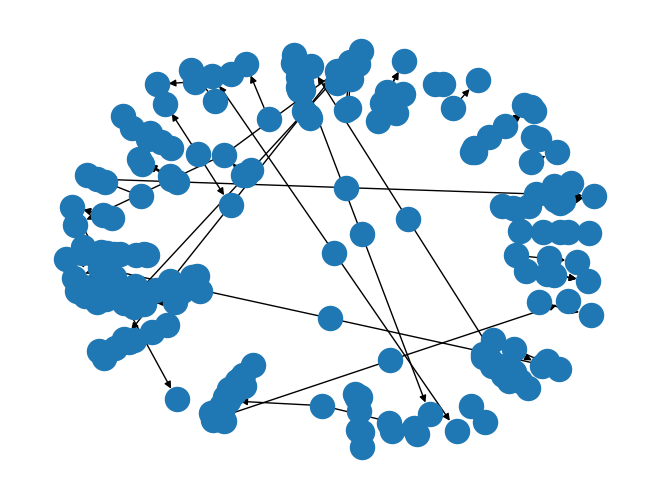

In [30]:
ilicit_ids = df_class_feature.loc[(df_class_feature['Time step'] == 20) & (df_class_feature['class'] == '1'), 'txId']
ilicit_edges = df_edges.loc[df_edges['txId1'].isin(ilicit_ids)]

graph = nx.from_pandas_edgelist(ilicit_edges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph)
nx.draw(graph, with_labels=False, pos=pos)

### LICIT TRANSACTIONS SUBGRAPH

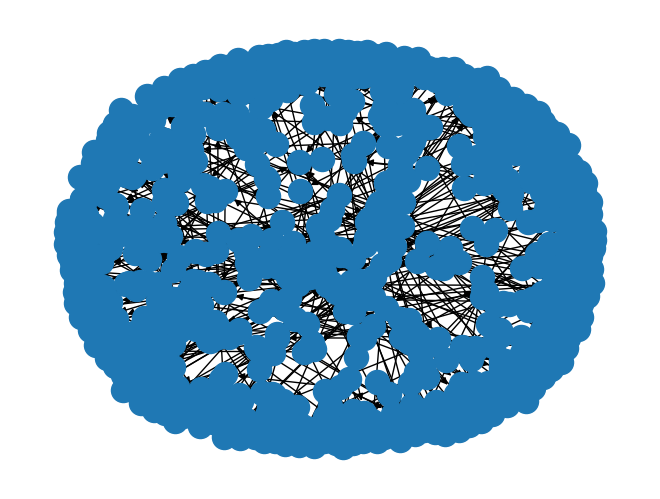

In [31]:
licit_ids = df_class_feature.loc[(df_class_feature['Time step'] == 20) & (df_class_feature['class'] == '2'), 'txId']
licit_edges = df_edges.loc[df_edges['txId1'].isin(licit_ids)]

graph = nx.from_pandas_edgelist(licit_edges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph)
nx.draw(graph, with_labels=False, pos=pos)

In [27]:
feature = df_class_feature.iloc[:, 3]  # Transaction value
class_label = df_class_feature['class']

In [28]:
# Pearson Correlation
corr, _ = pearsonr(feature, class_label)
print('Pearson Correlation:', corr)


Pearson Correlation: 0.0326152297298836
